In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import precision_recall_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score


In [3]:
df = pd.read_csv("../../data/processed/fraud_clean.csv")
df.head()

,Unnamed: 0,payment_type,amount,original_owner_id,old_balance_original,new_balance_original,destination_account_id,old_balance_destination,new_balance_destination,isFraud
0,14,PAYMENT,4098.78,C1026483832,503264.00,499165.22,M1635378213,0.0,0.0,0
1,62,DEBIT,8727.74,C166694583,882770.00,874042.26,C1129670968,12636.0,0.0,0
2,63,PAYMENT,2599.46,C885910946,874042.26,871442.79,M1860591867,0.0,0.0,0
3,241,PAYMENT,4635.18,C1110698130,6313782.05,6309146.87,M125644421,0.0,0.0,0
4,242,PAYMENT,1267.97,C1053632127,6309146.87,6307878.90,M1493158871,0.0,0.0,0


In [4]:
df.columns

Index(['Unnamed: 0', 'payment_type', 'amount', 'original_owner_id',
       'old_balance_original', 'new_balance_original',
       'destination_account_id', 'old_balance_destination',
       'new_balance_destination', 'isFraud'],
      dtype='object')

In [5]:
# drop columns, we don't need
df_drop = df.copy()
df_drop.drop(['Unnamed: 0', 'original_owner_id','destination_account_id'], axis = 1, inplace = True)
df_drop.columns

Index(['payment_type', 'amount', 'old_balance_original',
       'new_balance_original', 'old_balance_destination',
       'new_balance_destination', 'isFraud'],
      dtype='object')

In [6]:
### Build model

In [7]:
df_model = df_drop.copy()

In [8]:

encoder = LabelEncoder()

columns = df_model.columns

for i in columns:
    df_model[i] = encoder.fit_transform(df_model[i])

In [9]:
df_model.head()

,payment_type,amount,old_balance_original,new_balance_original,old_balance_destination,new_balance_destination,isFraud
0,3,7570,7775,10731,0,0,0
1,2,15469,36942,33361,860,0,0
2,3,4775,36553,33242,0,0,0
3,3,8539,132123,130405,0,0,0
4,3,2301,132070,130387,0,0,0


In [10]:
df_model['isFraud'].value_counts()

isFraud
0    192140
1        44
Name: count, dtype: int64

In [11]:
X = df_model.drop(['isFraud'], axis= 1)
y = df_model['isFraud']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 10)

In [13]:
lr = LogisticRegression()
lr_model = lr.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

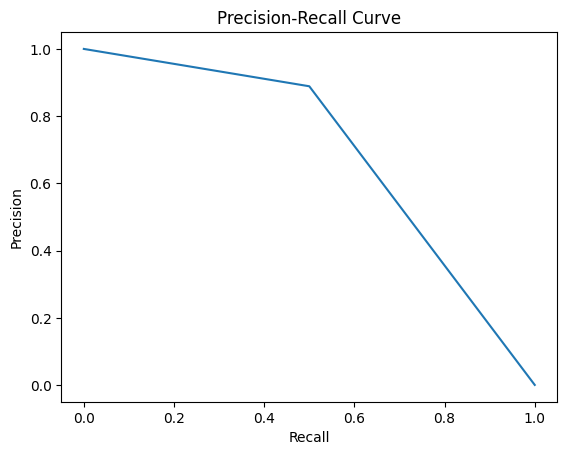

AUPRC =  0.694513821439033


In [14]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auprc = auc(recall, precision)

# Plotting AUPRC
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

print('AUPRC = ', auprc)

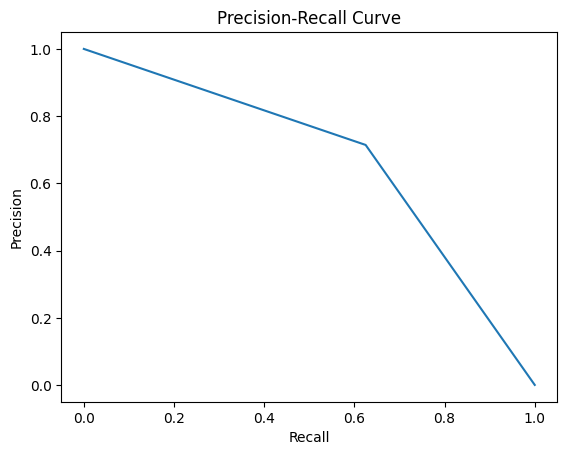

AUPRC =  0.6696948898887987


In [15]:
dt = DecisionTreeClassifier()

dt_model = dt.fit(x_train, y_train)
y_preddt = dt_model.predict(x_test)
precision, recall, thresolds = precision_recall_curve(y_test, y_preddt)
auprc = auc(recall, precision)

# Plotting AUPRC
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

print('AUPRC = ', auprc)

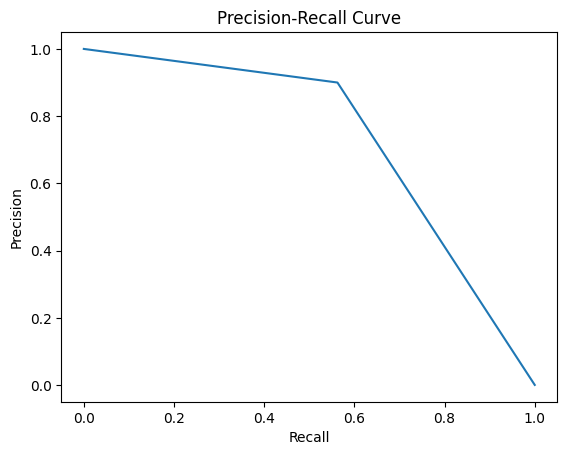

AUPRC =  0.7310331968919106


In [16]:

rf = RandomForestClassifier()

rf_model = rf.fit(x_train, y_train)
y_predrf = rf_model.predict(x_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_predrf)
auprc = auc(precision, recall)

# Plotting AUPRC
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

print('AUPRC = ', auprc)

In [17]:
# Creating , Hyperparameter Tuning and Fitting a Random Forest Classifier
'''
param_grid = {
    'n_estimators': [60, 90],
    'max_depth': [3,5,7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
} # Defining parameter grid for Grid Search

RFC = RandomForestClassifier(class_weight="balanced", random_state=42) # Intializing Classifier

grid_search = GridSearchCV(RFC, param_grid, scoring="f1", cv=5, n_jobs=-1, verbose=3) # Applying a GridSearch over the Parameter Grid, whilst scoring on F1 Score
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_ # Extracting Best Hyperparameters
print(best_params)
print(grid_search.best_score_)
'''

'\nparam_grid = {\n    \'n_estimators\': [60, 90],\n    \'max_depth\': [3,5,7],\n    \'min_samples_split\': [2, 5],\n    \'min_samples_leaf\': [1, 2],\n    \'max_features\': [\'sqrt\', \'log2\', None]\n} # Defining parameter grid for Grid Search\n\nRFC = RandomForestClassifier(class_weight="balanced", random_state=42) # Intializing Classifier\n\ngrid_search = GridSearchCV(RFC, param_grid, scoring="f1", cv=5, n_jobs=-1, verbose=3) # Applying a GridSearch over the Parameter Grid, whilst scoring on F1 Score\ngrid_search.fit(X_train, y_train)\n\nbest_params = grid_search.best_params_ # Extracting Best Hyperparameters\nprint(best_params)\nprint(grid_search.best_score_)\n'

In [18]:
#Defining and Refitting Random Forest Classifier with the best Hyperparameters

# RFF = RandomForestClassifier(random_state=42, class_weight="balanced", **best_params)  # If Hypertuned
RFC = RandomForestClassifier(
    n_estimators=100, criterion='gini',
    max_depth=None, max_features="sqrt", 
    bootstrap=True,
    oob_score=True,
    n_jobs=-1, 
    random_state=42,
    verbose=2,
    class_weight="balanced")

RFC.fit(x_train, y_train) # Fit
print(RFC.oob_score_)

building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.0s


building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100building tree 80 of 100
building tree 81 of 100

building tree 82 of 100
building tree 83 of 100
building tree 84

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished


0.9998736322549953


In [19]:
# Classification Report

# Predict on the test set
y_pred = RFC.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57640
           1       0.90      0.56      0.69        16

    accuracy                           1.00     57656
   macro avg       0.95      0.78      0.85     57656
weighted avg       1.00      1.00      1.00     57656



[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [20]:
# ROC AUC Score
roc_auc_score(y_test, y_pred)

0.7812413254684247

conclusion:

1) Which hyperparameter tuning strategy did you use? Grid-search or
random-search? Why

I used Grid search because it helps to find the best hyperparameter for a  machine learning model. in grid search, used hyperparameter value in the "param_grid" dictionary and this search is used to identify the most set of hyperparameters
   
   
2) How did your model's performance change after discovering optimal
hyperparameters?


during my grid search, i was able to improve my  model pereformance and was able to improve my accuracy and f1 score. 

3) What was your final F1 Score?
based on the report, we can conclude that

for class 0 : The F1 score is 1.00

for class 1 : The f1 score is 0.69

for weighted average :  we can conclude that the accuracy is a very good model performance.
